<a href="https://colab.research.google.com/github/kheit9527/2025_TCFST_Python_ML/blob/main/250707_Python_ML_Class03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/ximen_ai_20250630/raw/refs/heads/main/titanic/train.csv"
urlretrieve(url, "train.csv")

url = "https://github.com/Elwing-Chou/ximen_ai_20250630/raw/refs/heads/main/titanic/test.csv"
urlretrieve(url, "test.csv")


('test.csv', <http.client.HTTPMessage at 0x7f79a25c3390>)

In [ ]:
import pandas as pd

train = pd.read_csv("train.csv", encoding = "utf-8")
test = pd.read_csv("test.csv", encoding = "utf-8")


```
資料預處理(針對x<資料>):
0. 資料分成兩種:
a. 數值類型(有連續、大小關係的):
  Age, SibSP, Parch, Ticket(Count), Fare
b. 固定類型:
  Pclass, Sex, Cabin, Embarked

1. 把所有空值補上
2. 針對固定類型作One-hot
Extra. 做出更多欄位
```


In [ ]:
# 注意axis(0 = 依據列合併 or 1 = 依據行合併)
train_test = pd.concat([train, test], axis=0) # ignore_index = True

In [ ]:
train_test = train_test.drop(["PassengerId", "Survived"], axis = 1)

In [ ]:
train_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


```
pandas兩大操作:
1. 過濾
2. 轉換
```

In [ ]:
# Demo pandas
# 1. 過濾: 帶入跟你資料筆數一樣多的True / False
# 對到True: 留下, 對到False: 踢掉

fil = [True, False, True]
train_test.head(3)[fil]

fil = train_test["Age"] > 50
train_test[fil]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
33,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
...,...,...,...,...,...,...,...,...,...,...
356,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.0,2,0,11769,51.4792,C101,S
374,1,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54.0,1,1,33638,81.8583,A34,S
378,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S
387,2,"Ashby, Mr. John",male,57.0,0,0,244346,13.0000,NaN,S


In [ ]:
# Demo pandas
# 2. 轉換: apply(超級重要!)

In [ ]:
# Everything is an object
# 每個東西都有型態, 每個型態都有對應操作
# 型態: print, 一份步驟
# 操作: (3), 真的把步驟執行
# 錦囊: (型態)還沒打開, (操作)真的打開

b = int
b(5.6)

import random

def test_random(t):
    if t == 0:
        return random.randint
    else:
        return random.uniform
test_random(0)(1,5)


3

In [ ]:
# Demo pandas: apply
# DataFrame: 2d表格, Series: 1d(一行or一列)

# def flow(n):
    # return n + 100

flow = lambda n: n + 100

s = pd.Series([1, 2, 3, 4])
s.apply(flow) # flow不加小括號


,0
0,101
1,102
2,103
3,104


In [ ]:
def flow(s):
    # n = "Heikkinen, Miss. Laina"
    s_spl = s.split(",")[-1].split(".")[0]
    return s_spl.strip()

# value(counts)
name_apply = train_test["Name"].apply(flow)
name_apply.value_counts()

train_test["Name"] = name_apply
train_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,Dona,female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,Mr,male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
def flow(s):
    if pd.isna(s): # True: 真的是空的, False: 有東西
        return s
    else:
        return s[0]

cabin_apply = train_test["Cabin"].apply(flow)
train_test["Cabin"] = cabin_apply
train_test


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C,C
2,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,113803,53.1000,C,S
4,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,Dona,female,39.0,0,0,PC 17758,108.9000,C,C
415,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,Mr,male,NaN,0,0,359309,8.0500,NaN,S


```
250709_Class04_預處理
```


In [ ]:
counts = train_test["Ticket"].value_counts()

def flow(s):
    if pd.isna(s):
        return s
    else:
        return counts[s]

ticket_apply = train_test["Ticket"].apply(flow)
train_test["Ticket"] = ticket_apply
train_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,NaN,0,0,1,8.0500,NaN,S
414,1,Dona,female,39.0,0,0,3,108.9000,C,C
415,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
416,3,Mr,male,NaN,0,0,1,8.0500,NaN,S


In [ ]:
# 預處理第一步: 補空值
# 1. 類別: 最常出現
# 2. 數值: 中位數(比較)
# 中位數 / 平均
# 以前的偏度: 平均-中位數/標準差 -> 然而中位數與平均毫不相干, 不該扯再一起
# 現在的偏度: $ (變異數)**3/(標準差)**3/2
# 選中位數(例外:保險平均分配)

train_test.isna().sum().sort_values(ascending=False)

,0
Cabin,1014
Age,263
Embarked,2
Fare,1
Name,0
Pclass,0
Parch,0
SibSp,0
Sex,0
Ticket,0


In [ ]:
most = train_test["Embarked"].value_counts().idxmax() # idxmax: 取最大值前綴詞
train_test["Embarked"] = train_test["Embarked"].fillna(most)
train_test.isna().sum().sort_values(ascending=False)

,0
Cabin,1014
Age,263
Fare,1
Pclass,0
Name,0
Sex,0
Parch,0
SibSp,0
Ticket,0
Embarked,0


In [ ]:
# DataFrame/Series:
# 準備跟你資料一樣多的True/False
# 對到True則留下, 對到False則刪除

d = train_test.dtypes
category_cols = list(d[d == "object"].index) + ["Pclass"]
# category_cols = d[d == "object"].index
# category_cols = category_cols.tolist() + ['Pclass']
print(category_cols)
number_cols = d[d != "object"].index.drop("Pclass")
print(number_cols)

med = train_test[number_cols].median()
train_test = train_test.fillna(med)
# objects: 其實就是字串string
train_test.isna().sum().sort_values(ascending=False)

['Name', 'Sex', 'Cabin', 'Embarked', 'Pclass']
Index(['Age', 'SibSp', 'Parch', 'Ticket', 'Fare'], dtype='object')


,0
Cabin,1014
Pclass,0
Name,0
Sex,0
SibSp,0
Age,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [ ]:
# step2. 對類別型態的資料
# 不能直接把類別轉成0.1.2  Ex.登船點S.C.Q沒有大小之分
# one-hot encoding: 讓決策樹問"你是否從S登船?", 接著問"你是否從C登船?", 就能全部區分
# 問題: 車子型號?(本身沒有意義) -> 車子品牌、配備、能源

# 類別型態做One-hot encoding絕對沒問題
# 可以不做: 1. 有大小關係的類別 2. 二值型類別
# Pclass可否不做? -> 艙等有大小關係(經濟艙vs商務艙, 可以不做)
# ??? 到底做不做 ??? -> 做了可能會長很多層決策樹, 導致過擬合
# Name必做, 但為了表格的美觀, 預先把太稀少的丟掉
# Ex. Captain(稀少) -> 0 0 0
# Sex可以不做, 因為Male/Female互斥(二值型欄位), 但為了方便還是做
# Cabin: 直接做one-hot, NaN -> 0 0 0 0
# 類別型態: 可以不用補缺失值, 可以直接one-hot成0 0 0
# 補(做)or不補(不做): 沒有一定(做:針對單一問題), 做做看才知道哪個比較好

reserved = train_test["Name"].value_counts().index[:4]
def flow(s):
    if s in reserved:
        return s
    else:
        return None

train_test["Name"] = train_test["Name"].apply(flow)
train_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,28.0,0,0,1,8.0500,NaN,S
414,1,None,female,39.0,0,0,3,108.9000,C,C
415,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
416,3,Mr,male,28.0,0,0,1,8.0500,NaN,S


In [ ]:
pd.set_option('display.max_columns', 500)
train_test = pd.get_dummies(train_test, columns = category_cols)
train_test

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,38.0,1,0,2,71.2833,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
2,26.0,0,0,1,7.9250,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,35.0,1,0,2,53.1000,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False
4,35.0,0,0,1,8.0500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
414,39.0,0,0,3,108.9000,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
415,38.5,0,0,1,7.2500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
416,28.0,0,0,1,8.0500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True


```
預處理SOP:
1. 數值補中位數
2. 類別作One-Hot
extra: 想辦法利用比別人更多的資訊，讓決策樹可以做出選擇 -> 想辦法組合一些欄位
(如: 將SibSp和Parch組合在一起)

註: 年齡拆解成0~18(未成年), 防止過擬合?
-> 不要這麼做, 保留越精確的資料越好
```



In [ ]:
train_test["Family"] = train_test["SibSp"] + train_test["Parch"]
train_test

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,1
1,38.0,1,0,2,71.2833,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,1
2,26.0,0,0,1,7.9250,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,0
3,35.0,1,0,2,53.1000,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,1
4,35.0,0,0,1,8.0500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,0
414,39.0,0,0,3,108.9000,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,0
415,38.5,0,0,1,7.2500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,0
416,28.0,0,0,1,8.0500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,0


In [ ]:
# Demo pandas: loc(看列標籤) / iloc(看真的是第幾列)
demo = pd.DataFrame([
    [1,2],
    [3,4],
    [5,6]
], index = [1,1,2])

demo.iloc[1]

,1
0,3
1,4


In [ ]:
x = train_test.iloc[:len(train)]
y = train["Survived"]
x_predict = train_test.iloc[len(train):]
x_predict

# next time: tsme, 確定到底哪個因素跟survived真的有關之後, 再把因素挖出來

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,34.5,0,0,1,7.8292,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,0
1,47.0,1,0,1,7.0000,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,1
2,62.0,0,0,1,9.6875,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,0
3,27.0,0,0,1,8.6625,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,0
4,22.0,1,1,2,12.2875,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,0
414,39.0,0,0,3,108.9000,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,0
415,38.5,0,0,1,7.2500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,0
416,28.0,0,0,1,8.0500,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,0


```
250714_Class05_資料降維與判別
```


```
# 降低維度.控制維度
1. 損失行降維: (如：PCA，做一個座標軸的選轉，雖然丟得不多但還是可能偏差)

2. 非損失行降維:
tSNE(暴力法，只到搬到二維平面即可)
(轉化, 可能搬不過去)
三維畫高斯分布，知道距離，是否等於二維距離'

SNE:
面積: (不連續)1 (連續)高斯分布，下面面積=1
縱軸不一定要是機率

問題: d跟d'畫在同一個圖中，縮小時空間變擠(不要比例縮小)，差值差異大
** 遠的會被縮得比較近，近的反而差得沒那麼多
** (擁擠效應)
-> 遠的不要縮這麼多

tSNE:
維持: 1. 面積=1 2.中間胖or兩邊胖
目的: 轉化後的值要一樣
結果: 近的東西縮的幅度變大、更近
      遠的東西縮的幅度變小，更遠

因為是暴力破解，所以:
缺點: 1. 資料太多時需要篩選(不能全部放上去)
      2. 計算量大
      3. 一開始要給所有東西, 不能動態加入

優點: 沒有損失 -> 適合畫圖


** 損失型: 配合演算法
   非損失型: 畫圖

Try and Error: 先隨便放, 後續微幅調整
```


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE()
x_tsne = tsne.fit_transform(x)
x_tsne_df = pd.DataFrame(x_tsne)
x_tsne_df

,0,1
0,-21.778639,-17.945801
1,40.779438,0.275743
2,-28.759666,-7.203015
3,32.760254,-1.129489
4,-15.040663,17.720327
...,...,...
886,-11.251827,3.086350
887,9.563035,-8.913439
888,6.265306,-0.650694
889,12.316655,-4.658920


```
繪圖函式庫:
1. matplotlib: 所有東西的基礎
2. seaborn: 把matplotlib打包, 讓你比較好用

最常用的: 1. countplot 2. scatterplot
```



<Axes: xlabel='0', ylabel='1'>

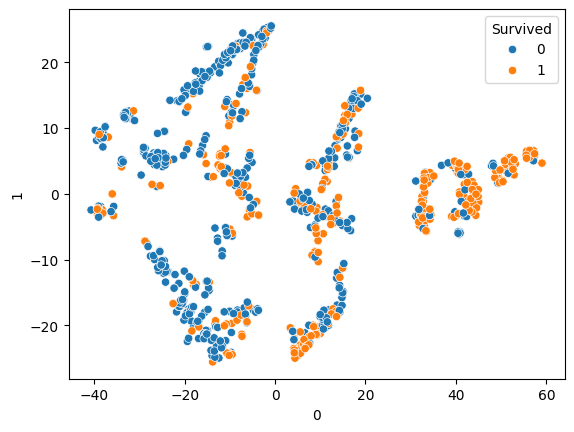

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = x_tsne_df[0],
                y = x_tsne_df[1],
                hue = y)


In [ ]:
y.value_counts()

,count
Survived,
0,549
1,342


In [ ]:
# 鐵達尼號用accuracy是沒有問題的
# 但多教你一點metrics的知識

from sklearn.model_selection import train_test_split
# train_test_split([1, 2, 3, 4], test_size = 0.1, random_state = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.1, random_state = 0)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(x_train, y_train)
pre = clf.predict(x_test)

# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, pre)

from sklearn.metrics import classification_report
print(classification_report(y_test, pre))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83        51
           1       0.79      0.77      0.78        39

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



```
Precision: 精確率(你說"是"的東西，有多少真的是"是")
Recall: 召回率(正確答案是"是"的東西, 有多少辨認出來)
** 絕對不可能兩個都高
   (精確率高:保守策略; 召回率高:積極策略)

** 不要哪一個過分的低，取平衡
   -> f1-score取一個理想結果
   (多選題: 我覺得有60%以上機率答對, 我才選
   -> 我希望多一點精確率, 所以放掉一點f1-score)

** enbalance dataset: 改用metrics - f1-score
   (因為資料比重差異極大，以此來辨別ML之結果好不好)
```



```
train_test_split 多做幾次:
1 2 3 4 5 6 7 8 9 10
Group1: 1~9: fit; 訓練 10: test 測試 -> DecisionTree -> Accuracy (or f1-score)
Group2: 1~8.10: fit; 9: test -> DT -> Accu.
...
Group10: 2~10: fit; 1: test -> DT -> Accu.
最後十組取平均: Cross Validation 交叉驗證


```



In [ ]:
# 基礎交叉驗證
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3)
scores = cross_val_score(clf, x, y, cv = 10, scoring='f1_macro', n_jobs = -1)
avg = np.average(scores)

print(scores)
print(avg)

# cv的排列組合可能? (-> 可以切更多份解決, 比如: 20份)
# n_jobs不會有僧多粥少的問題? (-> 根據cv數量決定)

[0.81092437 0.84770304 0.71746032 0.83926729 0.83518519 0.79400953
 0.8182437  0.74858757 0.85721925 0.8258317 ]
0.8094431956923636


In [ ]:
# 真正在用
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()

params = {
          "max_depth": range(3, 10)
}
cv = GridSearchCV(clf, params, cv = 10, scoring = 'f1_macro', n_jobs = -1)
cv.fit(x, y)

print(cv.best_params_)
print(cv.best_score_)

print(cv.best_estimator_)
print(cv.scorer_)

{'max_depth': 4}
0.8169700840258219
DecisionTreeClassifier(max_depth=4)
make_scorer(f1_score, response_method='predict', pos_label=None, average=macro)


```
Ensemble(組合式的決策樹):
    每一個演算法模型, 要用"略有不同的面相"來思考
    (不是一點點不同, Ex. 同一份民調資料, 不同電視台做分析的差異不大)
    *** 演算法不是重點, 資料才是 ***

    1. Bagging(平行式的組合)
       做法: 刻意餵給他們不同的資料, 再共同做判定
       (餵給A 90%的資料, 餵給B 90%的資料 ...)
       (瞎子摸象)
    Ex: Ramdom Forest 隨機森林
    *** 跟 Cross Validation的差別?
        -> Ramdom Forest會針對1~9的訓練資料,
        取出90%做成模型1.2.3.4... , 最後共同判斷結果

    2. Boosting(序列式的組合)
       做法: 每次強迫它換判斷的選項
       (前一個醫生放棄什麼判斷, 下一個醫生就做)
    Ex: XGBoost, Ada Boost
       缺點: 耗時(尤其資料量體大)
```


In [ ]:
# 真正在用2
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

params = {
          "max_depth":range(3, 7),
          "n_estimators":range(11, 100, 2)
}
cv = GridSearchCV(clf, params, cv = 10, scoring = 'f1_macro', n_jobs = -1)
cv.fit(x, y)

print(cv.best_params_)
print(cv.best_score_)


{'max_depth': 6, 'n_estimators': 59}
0.8288561183234318


In [ ]:
clf = RandomForestClassifier(max_depth = 6, n_estimators = 59)
clf.fit(x, y)
pre = clf.predict(x_predict)
df = {
    "PassengerId":test["PassengerId"],
    "Survived":pre
}
df = pd.DataFrame(df)
df.to_csv("rf.csv", index = False)

```
如果你需要印出59棵樹的某一顆(Ranaom Forest)
-> clf.estamators_
```



```
命中率不重要，解釋性才重要
-> 統計要有故事性(起頭, 過程, 結果)
```


In [ ]:
imp = clf.feature_importances_
pd.DataFrame({
    "name":x.columns,
    "imp":imp
}).sort_values("imp", ascending = False)

,name,imp
10,Sex_male,0.183094
9,Sex_female,0.145260
7,Name_Mr,0.138428
4,Fare,0.109711
0,Age,0.057625
24,Pclass_3,0.055442
3,Ticket,0.055197
25,Family,0.040859
22,Pclass_1,0.030284
8,Name_Mrs,0.029662


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '(0.34, 8.378]'),
  Text(1, 0, '(8.378, 16.336]'),
  Text(2, 0, '(16.336, 24.294]'),
  Text(3, 0, '(24.294, 32.252]'),
  Text(4, 0, '(32.252, 40.21]'),
  Text(5, 0, '(40.21, 48.168]'),
  Text(6, 0, '(48.168, 56.126]'),
  Text(7, 0, '(56.126, 64.084]'),
  Text(8, 0, '(64.084, 72.042]'),
  Text(9, 0, '(72.042, 80.0]')])

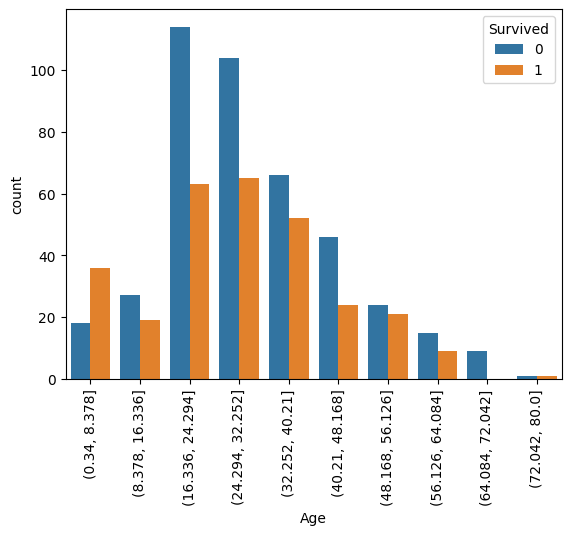

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sex 性別
# sns.countplot(x = train["Sex"], hue = train["Survived"])

# Fare 價格
# fc = pd.cut(train["Fare"], bins = 10) # 會多移10%, 所以最小值不會是0
# sns.countplot(x = fc, hue = train["Survived"])
# plt.xticks(rotation = 90)
# plt.ylim(0, 100)

# Family 關係
# sns.countplot(x = x["Family"], hue = train["Survived"])
# plt.xticks()

# Age 年齡
ac = pd.cut(train["Age"], bins = 10)
sns.countplot(x = ac, hue = train["Survived"])
plt.xticks(rotation = 90)

```
KNN: k-nearest neighbors
根據最近的幾個人是什麼, 就選跟他一樣的
Ex. k=3, 兩個人說0, 一個人說1, 則選0
** 算距離? -> 歐基里德
** 單位基數不同導致的問題?
   (比如: 年齡從1~80"歲", 家庭人數1~10"人",
    兩個平方起來算 (80-1)^2 vs (10-1)^2 差很多)
   -> 把每個欄位的單位搞到差不多
      (Scaling / Normalize)

最簡單的: Min / Max Scaling
-> 最小值移動到0, 最大值移動到1
-> 欄位就會比較類似

** 為何決策樹不用做Scaling?
-> 決策樹是透過"Gini係數"來判斷信心程度
-> 沒有算距離
-> 如果Case有在算距離, 則需要Scaling

** 測試資料要根據訓練資料的Scaling進行轉化
   Ex. Train: Age=0 -> 0, Age=100 -> 1
   Test: Age=30 -> 0.3, Age=60 -> 0.6

```


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_predict_scaled = scaler.transform(x_predict)


array([[0.27117366, 0.125     , 0.        , ..., 0.        , 1.        ,
        0.1       ],
       [0.4722292 , 0.125     , 0.        , ..., 0.        , 0.        ,
        0.1       ],
       [0.32143755, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.34656949, 0.125     , 0.33333333, ..., 0.        , 1.        ,
        0.3       ],
       [0.32143755, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.39683338, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
# 分開做的前置作業, 可不做
from sklearn.neighbors import KNeighborsClassifier
scaler = MinMaxScaler()
train_test_scaler = scaler.fit_transform(train_test)
x_scaled = train_test.iloc[:len(train)]
x_predict_scaled = train_test.iloc[len(train):]

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scaled, y)
pre = clf.predict(x_predict_scaled)

df = {
    "PassengerId":test["PassengerId"],
    "Survived":pre
}
df = pd.DataFrame(df)
df.to_csv("knn2.csv", index = False)